In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50000)

In [7]:
df = pd.read_csv('data/dataset.csv')

# EDA

### 1. Employer title (emp_title) - CATEGORICAL

In [9]:
print('Count uniques: ', len(df['emp_title'].unique()))
print('\nCount missing: ', df['emp_title'].isna().sum())
df['emp_title'] = df['emp_title'].fillna('None')
pd.DataFrame(df['emp_title'].value_counts().sort_values(ascending=False))

Count uniques:  8215

Count missing:  592


,emp_title
None,592
US Army,36
Bank of America,23
IBM,22
USAF,17
United States Air Force,16
US Navy,15
U.S. Army,14
Self Employed,14
Wells Fargo,14


In [10]:
def emp_title(data, pattern, category_name):
    """
    Find patterns and return a list with the common category name for 
    different patterns. For eg: If 'Walmart' appears in the following 
    formats ('walmart', 'Wal-Mart', 'Walmart')
    """
    unique_names = data['emp_title'].unique() 
    matches = [pattern.findall(i) for i in unique_names if len(pattern.findall(i)) > 0]
    matches = [item for l in matches for item in l]
    return matches


In [15]:
# Fill NA
df['emp_title'] = df['emp_title'].fillna('None')
    
# US Army
pattern = re.compile(r'[a-zA-Z\S]*^[uU][a-zA-Z\s\S]+[Aa][Rr][Mm][Yy][a-zA-Z\S]*')
print('US Army patterns: \n', emp_title(df, pattern, 'U.S. Army'), '\n')

# US Navy
pattern = re.compile(r'^[uU][a-zA-Z\s\S]+[Nn][Aa][Vv][Yy][a-zA-Z\S]*')
print('US Navy patterns: \n', emp_title(df, pattern, 'U.S. Navy'), '\n')

# Walmart
pattern = re.compile(r'^[Ww][Aa][a-zA-Z\S]+[tT]$[a-zA-Z\S]*')
print('Walmart patterns: \n', emp_title(df, pattern, 'Walmart'), '\n')

US Army patterns: 
 ['U.S. Army', 'US Army', 'US ARMY', 'United States Army', 'us army', 'US Army', 'United States Army', 'US military army', 'united states army', 'U.S. Army', 'united States Army', 'US Army', 'U.S army', 'Us Army', 'U.S Army', 'U. S. Army', 'Us army'] 

US Navy patterns: 
 ['US Navy', 'U.S. Navy', 'US Navy', 'US NAVY', 'Us Navy', 'United States Navy'] 

Walmart patterns: 
 ['Wal-Mart', 'WAL-MART', 'Walmart', 'WalMart', 'wal-mart', 'walmart'] 



### 2. Length in current job (emp_length) - NUMERICAL

Count missing:  0


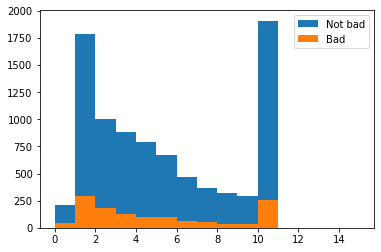

In [16]:
print('Count missing: ', df['emp_length'].isna().sum())

# Transformation
df['emp_length'] = [0 if i == 'na' else i for i in df['emp_length']]
df['emp_length'] = df['emp_length'].astype(int)

# EDA
plt.hist(df.loc[df['is_bad']==0, 'emp_length'], bins=[i for i in range(0,16)], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'emp_length'], bins=[i for i in range(0,16)], label='Bad')
plt.legend()
plt.show()

### 3. Home Ownership (home_ownership) - CATEGORICAL

In [17]:
# EDA
print('\nUniques - Not bad: ', df.loc[df['is_bad']==0, 'home_ownership'].unique())
print('\nUniques - Bad: ', df.loc[df['is_bad']==1, 'home_ownership'].unique())
print('\nValue counts: ')
print(df['home_ownership'].value_counts())


Uniques - Not bad:  ['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']

Uniques - Bad:  ['OWN' 'MORTGAGE' 'RENT' 'OTHER']

Value counts: 
RENT        4745
MORTGAGE    4445
OWN          775
OTHER         34
NONE           1
Name: home_ownership, dtype: int64


### 4. Annual Income (annual_inc) - NUMERICAL

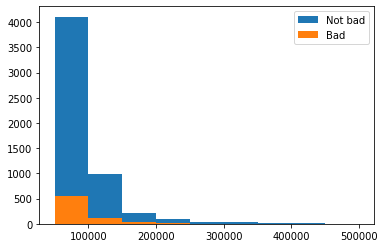

In [18]:
# EDA
plt.hist(df.loc[df['is_bad']==0, 'annual_inc'], bins=[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'annual_inc'], bins=[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000], label='Bad')
plt.legend()
plt.show()

In [19]:
print('Count missing: ', df['annual_inc'].isna().sum())

Count missing:  1


### 5. Verification Status (verification_status) - CATEGORICAL

In [20]:
print('Unique value counts: ', df['verification_status'].unique())
print('\nCount missing: ', df['verification_status'].isna().sum())
print('\nUniques - Not bad: ', df.loc[df['is_bad']==0, 'verification_status'].unique())
print('\nUniques - Bad: ', df.loc[df['is_bad']==1, 'verification_status'].unique())
print('\nValue counts: ')
print(df['verification_status'].value_counts())

Unique value counts:  ['not verified' 'VERIFIED - income' 'VERIFIED - income source']

Count missing:  0

Uniques - Not bad:  ['not verified' 'VERIFIED - income' 'VERIFIED - income source']

Uniques - Bad:  ['VERIFIED - income source' 'not verified' 'VERIFIED - income']

Value counts: 
not verified                4367
VERIFIED - income           3214
VERIFIED - income source    2419
Name: verification_status, dtype: int64


### 6. Payment plan (pymnt_plan) - DROPPED

In [21]:
print('Unique: ', df['pymnt_plan'].unique())
print('\nCount missing: ', df['pymnt_plan'].isna().sum())
print('\nValue counts: ')
print(df['pymnt_plan'].value_counts())

Unique:  ['n' 'y']

Count missing:  0

Value counts: 
n    9998
y       2
Name: pymnt_plan, dtype: int64


### 7. Notes (notes)

In [22]:
def lambda_nltk_notes(data, col_names):

    data[col_names] = data[col_names].fillna('None')
    stop_words = stopwords.words('english')
    stop_words.append('br/')
    special_char = re.compile(r'[\W]')
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    sample = []
    for index, note in enumerate(data[col_names]):
        word_tokens = word_tokenize(note)
        no_stops = [i for i in word_tokens if i.lower() not in stop_words]
        no_special = [special_char.sub('',i) for i in no_stops if special_char.sub('',i) != '']
        stem_lemma = " ".join(ps.stem(lemmatizer.lemmatize(i.lower())) for i in no_special)
        sample.append(stem_lemma)

    return sample


In [23]:
lambda_nltk_notes(df, 'Notes')

['none',
 'borrow ad 041411 use loan pay expens accru last six month credit card due combin job transit reloc job medic expens broken tibula gener overpay monthli minimum debt expect loan repaid sooner 5 year steadi job work inform technolog field ve employ fulltim field eight year present employ seven month good stand monthli budget breakdown 13 paycheck go rent bill 13 go live job transit expens 13 remain gener spend payment',
 'none',
 'none',
 'want consolid debt pay vacat buy ring',
 'none',
 'borrow ad 051810 mick credit card consolid loan 100 payoff credit card debt amex sear maci bank america',
 'borrow ad 112911 loan debt consolid paid time employ healthcar industri 6 year sinc move nv 7 year ago alway stabl job posit thank much assist br',
 'none',
 'loan would 2006 pt cruiser 300 mile still full warranti till dec 2009 effect',
 'none',
 '569486 ad 110709 two high earner earli thirti w increas earn potenti futur appli 36 month month loan goal pay 30 month use loan consolid de

### 8. Purpose category for loan (purpose_cat)

In [24]:
print("Missing values: ",df['purpose_cat'].isna().sum())
print("\nUniques: ", df['purpose_cat'].unique())
print("\nValue counts: ")
print(df['purpose_cat'].value_counts())
purpose_df = pd.DataFrame(df['purpose_cat'].value_counts())
purpose_df.reset_index(inplace=True) 
other_small_business = list(purpose_df.loc[purpose_df['purpose_cat'] < 90, 'index'])
print('\nOther small business: ')
print(other_small_business)

df.loc[:,'purpose_cat_new'] = [i if i not in other_small_business else 'other small business' for i in df['purpose_cat']]
# print(df[['purpose_cat', 'purpose_cat_new']])
print('\nNew value counts: ')
print(df['purpose_cat_new'].value_counts())


Missing values:  0

Uniques:  ['medical' 'debt consolidation' 'credit card' 'other' 'car' 'wedding'
 'other small business' 'house' 'small business' 'educational'
 'major purchase' 'home improvement' 'vacation'
 'debt consolidation small business' 'moving' 'credit card small business'
 'wedding small business' 'small business small business'
 'home improvement small business' 'major purchase small business'
 'educational small business' 'house small business' 'renewable energy'
 'moving small business' 'medical small business'
 'vacation small business' 'car small business']

Value counts: 
debt consolidation                   4454
credit card                          1273
other                                1026
home improvement                      800
major purchase                        546
small business                        461
car                                   349
wedding                               250
medical                               183
moving                  

### 9. Purpose (purpose) - Dropped

In [25]:
print("Missing values: ",df['purpose'].isna().sum())
print("Uniques: ", df['purpose'].unique())
print("Value counts: \n")
print(df['purpose'].value_counts())


Missing values:  4
Uniques:  ['Medical' 'My Debt Consolidation Loan' 'AP Personal Loan' ...
 'Updates Needed on Family owned home' 'Scottish Wedding'
 'Harnessing credit debt for a stable future.']
Value counts: 

Debt Consolidation                                                                  530
Debt Consolidation Loan                                                             412
Personal Loan                                                                       143
Consolidation                                                                       125
debt consolidation                                                                  116
Home Improvement                                                                    106
Small Business Loan                                                                  95
Personal                                                                             89
Credit Card Consolidation                                                         

### 10. Zipcode (zip_code) - Dropped

In [27]:
len(df['zip_code'].unique())
print(df['zip_code'].value_counts())

100xx    158
112xx    141
945xx    129
070xx    125
606xx    114
900xx    107
021xx     99
941xx     95
926xx     94
750xx     93
300xx     93
331xx     93
770xx     90
921xx     90
917xx     82
117xx     81
852xx     77
201xx     70
080xx     65
925xx     65
951xx     64
113xx     63
902xx     61
891xx     60
913xx     59
334xx     59
600xx     58
980xx     56
303xx     56
928xx     56
920xx     55
207xx     54
200xx     54
212xx     52
301xx     52
787xx     51
088xx     51
554xx     50
923xx     48
958xx     48
940xx     48
208xx     48
330xx     47
328xx     47
104xx     46
950xx     45
601xx     44
981xx     44
802xx     43
191xx     43
190xx     43
752xx     42
774xx     42
302xx     42
327xx     41
481xx     41
853xx     40
782xx     40
604xx     40
028xx     40
850xx     39
152xx     39
773xx     38
760xx     37
333xx     37
210xx     37
060xx     36
068xx     36
840xx     36
922xx     35
275xx     35
322xx     35
111xx     35
441xx     33
064xx     33
775xx     33
018xx     33

### 11. Address State (addr_state)

In [28]:
print('Unique states: ', df['addr_state'].unique())
print('\nValue counts: ')
print(df['addr_state'].value_counts())
print(df['addr_state'].isna().sum())

Unique states:  ['TX' 'KS' 'CA' 'NY' 'OH' 'DC' 'NV' 'IL' 'WA' 'DE' 'FL' 'NJ' 'OK' 'VA'
 'NH' 'MA' 'NC' 'OR' 'GA' 'CO' 'MD' 'CT' 'MO' 'WI' 'AZ' 'SC' 'MN' 'MI'
 'PA' 'AK' 'AR' 'LA' 'HI' 'WV' 'KY' 'RI' 'AL' 'SD' 'NM' 'ID' 'UT' 'MT'
 'WY' 'VT' 'TN' 'IA' 'MS' 'NE' 'IN' 'ME']

Value counts: 
CA    1748
NY     958
FL     714
TX     700
NJ     482
VA     392
IL     386
PA     378
GA     357
MA     331
OH     292
MD     282
WA     217
AZ     210
CT     195
NC     194
MI     176
CO     175
MO     167
MN     136
SC     126
WI     124
AL     119
NV     114
OR     109
KY     103
OK      98
LA      97
UT      68
KS      57
DC      54
RI      53
NH      50
AR      48
WV      45
NM      43
DE      35
HI      32
AK      26
MT      25
WY      23
SD      19
VT      18
MS       9
TN       5
NE       3
IN       3
IA       2
ID       1
ME       1
Name: addr_state, dtype: int64
0


### 12. Ratio of debt to income (debt_to_income)

Count missing:  0


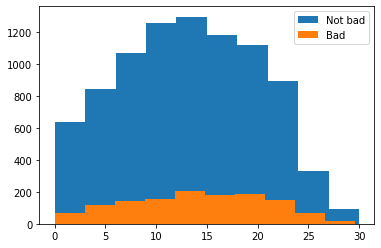

In [29]:
print('Count missing: ', df['debt_to_income'].isna().sum())

plt.hist(df.loc[df['is_bad']==0, 'debt_to_income'], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'debt_to_income'], label='Bad')
plt.legend()
plt.show()

### 13. Any delinquency in last 2 years (delinq_2yrs)

Count missing:  5


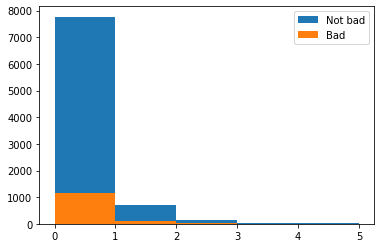

In [30]:
print('Count missing: ', df['delinq_2yrs'].isna().sum())

plt.hist(df.loc[df['is_bad']==0, 'delinq_2yrs'], bins=[0,1,2,3,4,5], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'delinq_2yrs'], bins=[0,1,2,3,4,5], label='Bad')
plt.legend()
plt.show()

### 14. First credit date (earliest_cr_line)

In [31]:
df['quarter'] = [str(i.quarter) for i in pd.to_datetime(df['earliest_cr_line'])]
df['year'] = [str(i.year) for i in pd.to_datetime(df['earliest_cr_line'])]

# print(df['year'].value_counts())
cr_line_df = pd.DataFrame(df['year'].value_counts())
cr_line_df.reset_index(inplace=True) 
other_years = list(cr_line_df.loc[cr_line_df['year'] < 90, 'index'])
print(other_years)

df.loc[:,'year'] = [i if i not in other_years else 'other' for i in df['year']]
print(df['year'].value_counts())



['1983', '1982', '1979', '1978', '1980', '1981', '2008', '1976', '1977', '1973', '1975', '1970', '1974', '1972', '1971', '1969', '1968', '1967', 'nan', '1965', '1966', '1963', '1962', '1964', '1950', '1959', '1956']
2000     839
1998     748
1999     715
2001     642
1997     601
1996     592
other    519
1995     518
1994     513
2002     503
2003     455
2004     439
2005     401
1993     383
2006     323
1991     257
1990     255
1992     254
1989     208
2007     180
1987     176
1988     159
1986     116
1984     112
1985      92
Name: year, dtype: int64


### 15. Number of inquiries (inq_last_6mths)

Count missing:  5


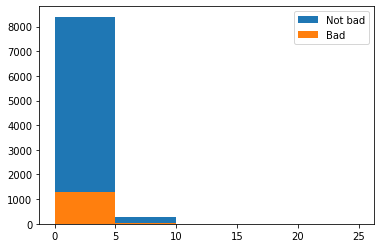

In [32]:
print('Count missing: ', df['inq_last_6mths'].isna().sum())

# Transformation
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)

plt.hist(df.loc[df['is_bad']==0, 'inq_last_6mths'], bins=[0, 5, 10, 15, 20, 25], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'inq_last_6mths'], bins=[0, 5, 10, 15, 20, 25], label='Bad')
plt.legend()
plt.show()

### 16. (mths_since_last_delinq) - Dropped

Count missing:  6316
Average:  35.89033659066232


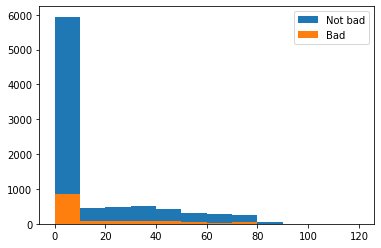

In [33]:
print('Count missing: ', df['mths_since_last_delinq'].isna().sum())
print('Average: ', df['mths_since_last_delinq'].mean())

# Transformation
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

plt.hist(df.loc[df['is_bad']==0, 'mths_since_last_delinq'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'mths_since_last_delinq'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], label='Bad')
plt.legend()
plt.show()

### 17. (mths_since_last_record) - Dropped

Count missing:  9160
Average:  61.65238095238095


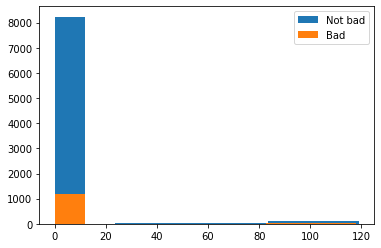

In [34]:
print('Count missing: ', df['mths_since_last_record'].isna().sum())
print('Average: ', df['mths_since_last_record'].mean())

# Transformation
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(0)

plt.hist(df.loc[df['is_bad']==0, 'mths_since_last_record'], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'mths_since_last_record'], label='Bad')
plt.legend()
plt.show()

### 18. Credit based (open_acc)

Count missing:  5

Min:  1.0 
Max:  39.0


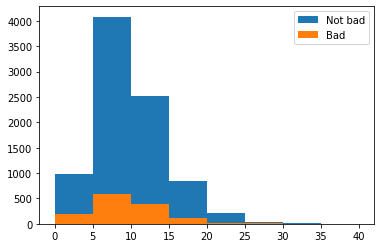

In [35]:
print('Count missing: ', df['open_acc'].isna().sum())
print('\nMin: ', df['open_acc'].min(), '\nMax: ', df['open_acc'].max())

# Transformation
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].mean())

plt.hist(df.loc[df['is_bad']==0, 'open_acc'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'open_acc'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40], label='Bad')
plt.legend()
plt.show()

### 19. (pub_rec)


Value counts: 
0.0    9422
1.0     550
2.0      18
3.0       5
Name: pub_rec, dtype: int64

Count missing:  5


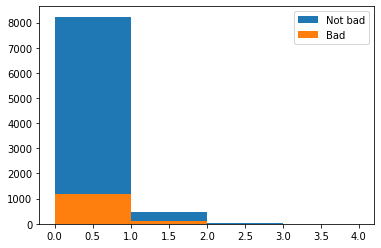

In [36]:
print('\nValue counts: ')
print(df['pub_rec'].value_counts())
print('\nCount missing: ', df['pub_rec'].isna().sum())

# Transformation
df['pub_rec'] = df['pub_rec'].fillna(0.0)

plt.hist(df.loc[df['is_bad']==0, 'pub_rec'], bins=[0, 1, 2, 3, 4], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'pub_rec'], bins=[0, 1, 2, 3, 4], label='Bad')
plt.legend()
plt.show()

### 20. (revol_bal)

Count missing:  0

Min:  0 
Max:  1207359


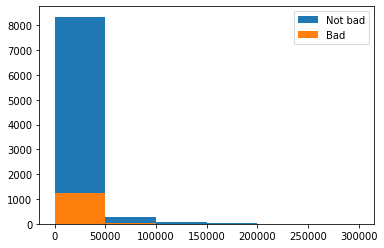

In [37]:
print('Count missing: ', df['revol_bal'].isna().sum())
print('\nMin: ', df['revol_bal'].min(),'\nMax: ', df['revol_bal'].max())

plt.hist(df.loc[df['is_bad']==0, 'revol_bal'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'revol_bal'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000], label='Bad')
plt.legend()
plt.show()

### 21. (revol_util)

Count missing:  26

Min:  0.0 
Max:  100.6

Average:  48.45077100461199


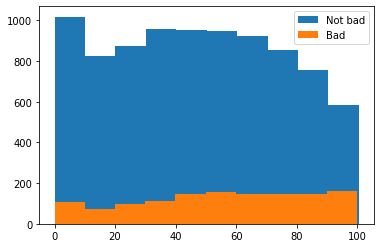

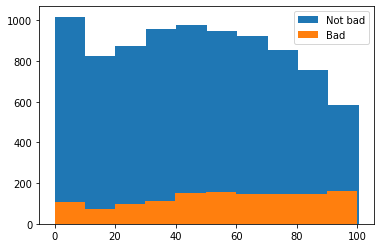

In [38]:
print('Count missing: ', df['revol_util'].isna().sum())
print('\nMin: ', df['revol_util'].min(), '\nMax: ', df['revol_util'].max())
print('\nAverage: ', df['revol_util'].mean())

plt.hist(df.loc[df['is_bad']==0, 'revol_util'], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'revol_util'], label='Bad')
plt.legend()
plt.show()

# Transformation
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

plt.hist(df.loc[df['is_bad']==0, 'revol_util'], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'revol_util'], label='Bad')
plt.legend()
plt.show()

### 22. (total_acc)

Count missing:  5


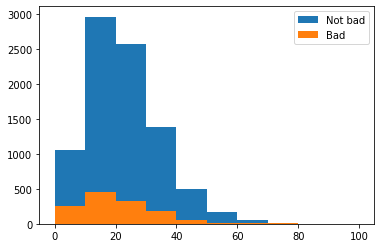

Average - Not bad:  22.261149425287357
Average - Bad:  20.332818532818532


In [39]:
print('Count missing: ', df['total_acc'].isna().sum())

plt.hist(df.loc[df['is_bad']==0, 'total_acc'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], label='Not bad')
plt.hist(df.loc[df['is_bad']==1, 'total_acc'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], label='Bad')
plt.legend()
plt.show()

print('Average - Not bad: ', df.loc[df['is_bad']==0, 'total_acc'].mean())
print('Average - Bad: ', df.loc[df['is_bad']==1, 'total_acc'].mean())

# Transformation
df['total_acc'] = df['total_acc'].fillna(df['total_acc'].mean())

### 23. (initial_list_status) - Dropped

In [40]:
print('Unique: ', df['initial_list_status'].unique())
print('\nValue counts: ')
print(df['initial_list_status'].value_counts())

Unique:  ['f' 'm']

Value counts: 
f    9983
m      17
Name: initial_list_status, dtype: int64


### 24. (collections_12_mths_ex_med) - Dropped

In [41]:
print('Value counts: ')
print(df['collections_12_mths_ex_med'].value_counts())
print('\nCount missing: ', df['collections_12_mths_ex_med'].isna().sum())

Value counts: 
0.0    9968
Name: collections_12_mths_ex_med, dtype: int64

Count missing:  32


### 25. (mths_since_last_major_derog) - Numerical

In [42]:
print('Count missing: ', df['mths_since_last_major_derog'].isna().sum())
print('\nValue counts: ')
print(df['mths_since_last_major_derog'].value_counts())

Count missing:  0

Value counts: 
2    3424
3    3299
1    3277
Name: mths_since_last_major_derog, dtype: int64


### 26. (policy_code) - categorical

In [43]:
print('Count missing: ', df['policy_code'].isna().sum())
print('\nValue counts: ')
print(df['policy_code'].value_counts())

Count missing:  0

Value counts: 
PC3    2098
PC5    2025
PC1    1978
PC2    1962
PC4    1937
Name: policy_code, dtype: int64
